## Pandas analysis

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import csv

In [ ]:
# If you didn't download it yet, please get the relevant file now!
!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

1. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

In [62]:
#Create a Pandas DataFrame
file_name = '/Users/Bahar/Downloads/data_000637.txt'
data_file = pd.read_csv(file_name, sep =',')
data_frame = pd.DataFrame(data_file)
print ('The original DataFrame:\n')
display(data_frame) # maximum number of rows = 1310720

#Create a new DataFrame
N = 1200000 # 10,000 < N <= maximum number of rows ------------------->  Assume N = 1,200,000
new_data_frame = data_frame[:N]
print ('\n', 'The New DataFrame:\n')
display(new_data_frame) # new data frame's number of rows = 1,200,000

The original DataFrame:



,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14
1310716,1,1,4,3869211171,763,11
1310717,1,0,64,3869211171,764,0
1310718,1,0,139,3869211171,769,0



 The New DataFrame:



,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
1199995,1,1,21,3869210435,2630,12
1199996,1,0,63,3869210435,2629,19
1199997,1,0,58,3869210435,2685,18
1199998,1,0,64,3869210435,2686,2


2\. Find out the number of BX in a ORBIT (the value 'x').

In [63]:
#find the maximum and minimum value of TDC and BX

TDC_column = data_frame['TDC_MEAS']
BX_column = data_frame['BX_COUNTER']

max_TDC = TDC_column.max()
min_TDC = TDC_column.min()
max_BX = BX_column.max()
min_BX = BX_column.min()

TDC = max_TDC- min_TDC + 1
BX = max_BX - min_BX + 1

print('The Number of TDC in a BX = ', TDC)
print('The Number of BX in an Orbit = ', BX)

The Number of TDC in a BX =  30
The Number of BX in an Orbit =  3564


3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

In [64]:
#estimate the time for the original DataFrame
T_ORBIT_orininal = (data_frame['ORBIT_CNT'].max() - data_frame['ORBIT_CNT'].min()) * BX * 25
T_BX_original = (data_frame['BX_COUNTER'].max() - data_frame['BX_COUNTER'].min()) * 25
T_TDC_original = (data_frame['TDC_MEAS'].max() - data_frame['TDC_MEAS'].min()) * (25 / 30)
T_total = T_ORBIT_orininal + T_BX_original + T_TDC_original
print('The Estimated time on the whole DataFrame: ', T_total, 'ns')

#the estimated time on the new DataFrame will be less than the estimated time on the original DataFrame
#since we have reduced the samples in the new DataFrame
T_ORBIT_reduced = (new_data_frame['ORBIT_CNT'].max() - new_data_frame['ORBIT_CNT'].min()) * BX * 25
T_BX_reduced = (new_data_frame['BX_COUNTER'].max() - new_data_frame['BX_COUNTER'].min()) * 25
T_TDC_reduced = (new_data_frame['TDC_MEAS'].max() - new_data_frame['TDC_MEAS'].min()) * (25 / 30)
T_reduced = T_ORBIT_reduced + T_BX_reduced + T_TDC_reduced
print('The Estimated time on the new DataFrame: ', T_reduced, 'ns')


The Estimated time on the whole DataFrame:  980545499.1666666 ns
The Estimated time on the new DataFrame:  914967899.1666666 ns


4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

In [65]:
#add a new column to the dataframe  

ORBIT = (data_frame['ORBIT_CNT'] * BX * 25)
BX1 = (data_frame['BX_COUNTER'] * 25)
TDC1 = (data_frame['TDC_MEAS']) * (25/30)
data_frame['ABS_TIME'] = ((ORBIT + BX1 + TDC1))
data_frame

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ABS_TIME
0,1,0,123,3869200167,2374,26,3.447457e+14
1,1,0,124,3869200167,2374,27,3.447457e+14
2,1,0,63,3869200167,2553,28,3.447457e+14
3,1,0,64,3869200167,2558,19,3.447457e+14
4,1,0,64,3869200167,2760,25,3.447457e+14
...,...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14,3.447467e+14
1310716,1,1,4,3869211171,763,11,3.447467e+14
1310717,1,0,64,3869211171,764,0,3.447467e+14
1310718,1,0,139,3869211171,769,0,3.447467e+14


5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.


In [66]:
data_frame['HEAD'] = np.random.randint(0, 2, size = len(data_frame))
data_frame

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ABS_TIME
0,1,0,123,3869200167,2374,26,3.447457e+14
1,1,0,124,3869200167,2374,27,3.447457e+14
2,1,0,63,3869200167,2553,28,3.447457e+14
3,0,0,64,3869200167,2558,19,3.447457e+14
4,1,0,64,3869200167,2760,25,3.447457e+14
...,...,...,...,...,...,...,...
1310715,0,0,62,3869211171,762,14,3.447467e+14
1310716,1,1,4,3869211171,763,11,3.447467e+14
1310717,1,0,64,3869211171,764,0,3.447467e+14
1310718,1,0,139,3869211171,769,0,3.447467e+14


6\. Create a new DataFrame that contains only the rows with HEAD=1.

In [67]:
#create the DataFrame['HEAD=1']
data_frame_2 = data_frame[data_frame['HEAD'] == 1]
display(data_frame_2)

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ABS_TIME
0,1,0,123,3869200167,2374,26,3.447457e+14
1,1,0,124,3869200167,2374,27,3.447457e+14
2,1,0,63,3869200167,2553,28,3.447457e+14
4,1,0,64,3869200167,2760,25,3.447457e+14
6,1,0,61,3869200167,2772,14,3.447457e+14
...,...,...,...,...,...,...,...
1310707,1,0,57,3869211171,137,29,3.447467e+14
1310708,1,0,124,3869211171,199,9,3.447467e+14
1310716,1,1,4,3869211171,763,11,3.447467e+14
1310717,1,0,64,3869211171,764,0,3.447467e+14


7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

<ipython-input-72-64d5a17024ad>:13: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-72-64d5a17024ad>:25: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


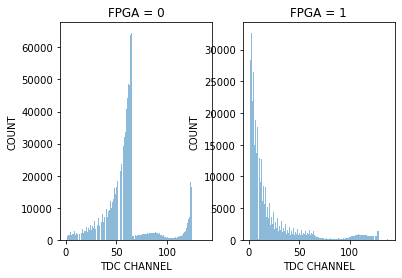

In [72]:
import matplotlib.pyplot as plt


# FPGA = 0
plt.subplot(1, 2, 1)
FPGA_0 = data_frame[data_frame['FPGA'] == 0]
TDC_COUNT_0 = FPGA_0['TDC_CHANNEL']

ax1 = plt.hist( TDC_COUNT_0, bins = np.arange(TDC_COUNT_0.min(), TDC_COUNT_0.max()), label = '0', alpha = 0.5)
plt.xlabel('TDC CHANNEL')
plt.ylabel('COUNT')
plt.title('FPGA = 0')
plt.show()


# FPGA = 1
plt.subplot(1, 2, 2)
FPGA_1 = data_frame[data_frame['FPGA'] == 1]
TDC_COUNT_1 = FPGA_1['TDC_CHANNEL']

ax2 = plt.hist( TDC_COUNT_1, bins = np.arange(TDC_COUNT_1.min(), TDC_COUNT_1.max()), label = '0', alpha = 0.5)
plt.xlabel('TDC CHANNEL')
plt.ylabel('COUNT')
plt.title('FPGA = 1')
plt.show()

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

In [95]:
TDC_COUNT= data_frame.groupby('TDC_CHANNEL').size().sort_values(ascending = False).head(3)
print('The most noicy Channels:\n')
TDC_COUNT.to_frame('TDC_COUNT')

The most noicy Channels:



,TDC_COUNT
TDC_CHANNEL,
139,108059
64,66020
63,64642




9. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139


In [116]:
# number of unique orbits
unique_orbit_number = data_frame.groupby('ORBIT_CNT').size().reset_index()
print('Number of unique orbits: ', len(unique_orbit_number), '\n')
display(unique_orbit_number)

# number of unique orbits with at least one measurement from TDC_CHANNEL = 139
unique_orbit_number_w139 = data_frame[data_frame['TDC_CHANNEL'] == 139].groupby('ORBIT_CNT').size().reset_index()
print('\n Number of unique orbits with at least one measurement from TDC_CHANNEL = 139: ', len(unique_orbit_number_w139), '\n')
display(unique_orbit_number_w139)

Number of unique orbits:  11001 



,ORBIT_CNT,0
0,3869200167,43
1,3869200168,85
2,3869200169,127
3,3869200170,98
4,3869200171,109
...,...,...
10996,3869211167,208
10997,3869211168,109
10998,3869211169,191
10999,3869211170,137



 Number of unique orbits with at least one measurement from TDC_CHANNEL = 139:  10976 



,ORBIT_CNT,0
0,3869200167,4
1,3869200168,8
2,3869200169,11
3,3869200170,9
4,3869200171,9
...,...,...
10971,3869211167,19
10972,3869211168,8
10973,3869211169,13
10974,3869211170,12
